In [6]:
import pandas as pd
import numpy as np

import os

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data_dir = 'airbnb_data/'

In [ ]:
os.listdir(data_dir)

['Reviews.csv',
 'Listings_data_dictionary.csv',
 'Reviews_data_dictionary.csv',
 'Listings.csv']

In [17]:
def read_dataset(filename):
    data = pd.read_csv(os.path.join(data_dir, filename), encoding_errors="ignore")
    return data

In [18]:
listings = read_dataset('Listings.csv')
reviews = read_dataset('Reviews.csv')

/tmp/ipykernel_10680/1775268693.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(data_dir, filename), encoding_errors="ignore")


In [39]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [22]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [30]:
print(listings['city'].value_counts())

print("Количество пустых NaN: ", listings['city'].isna().sum())

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64
Количество пустых NaN:  0


In [34]:
listings.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [36]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

#### Количество городов каждого хоста

In [42]:
def host_cities(df):
    host_cities = df.groupby("host_id")["city"].unique().reset_index()

    host_cities["city_count"] = host_cities["city"].apply(lambda x: len(x))
    
    print(host_cities["city_count"].value_counts())
        
host_cities(listings)

city_count
1    181874
2       147
8         2
3         1
Name: count, dtype: int64


#### Количество верифицированных хостов

In [43]:
listings['host_identity_verified'].value_counts()

host_identity_verified
t    201191
f     78356
Name: count, dtype: int64

#### Количество квартир, которые можно забукать без подтверждения

In [47]:
listings['instant_bookable'].value_counts()

instant_bookable
f    164105
t    115607
Name: count, dtype: int64

In [48]:
instant_bookable_by_city = listings.groupby('city')['instant_bookable'].count().sort_values(ascending = False)

In [49]:
instant_bookable_by_city

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: instant_bookable, dtype: int64

Text(0.5, 1.0, 'Количество квартир которые без подтверждения')

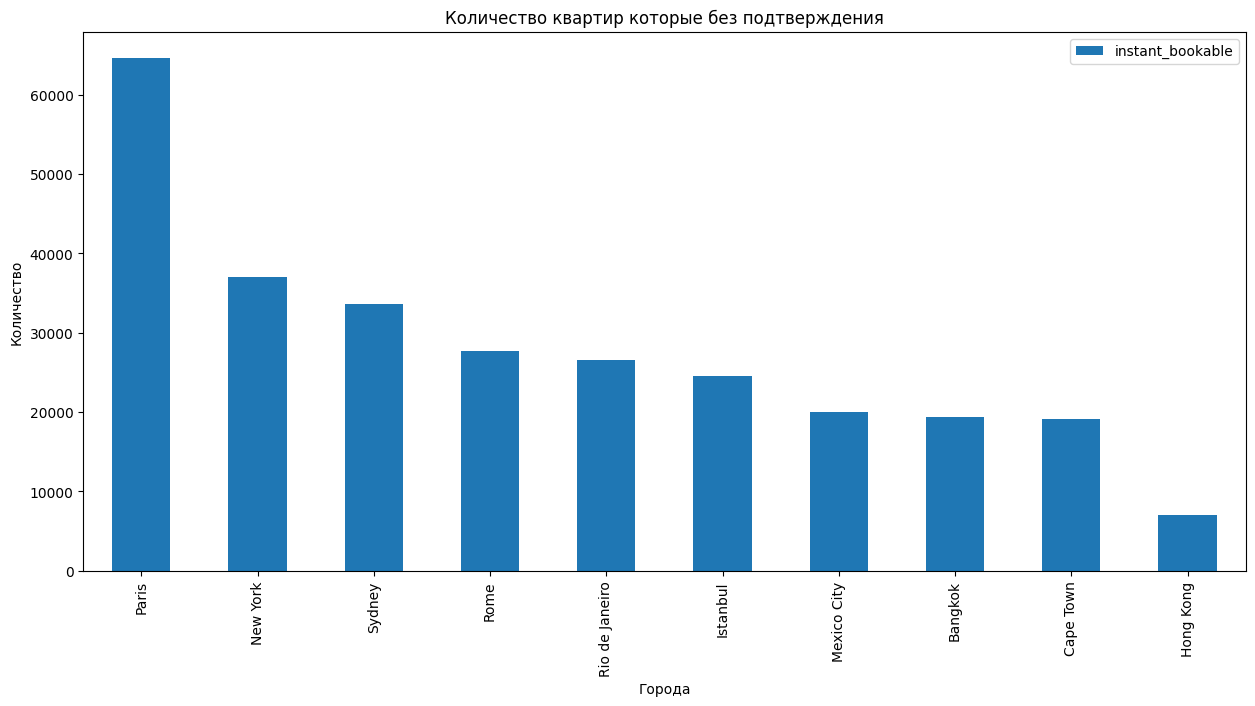

In [51]:
instant_bookable_by_city.to_frame().plot(kind = 'bar', figsize = (15,7))
plt.xlabel("Города")
plt.ylabel("Количество")
plt.title("Количество квартир которые без подтверждения")

#### Цена квартиры

In [57]:
bedrooms = listings.groupby('city')['bedrooms'].count().sort_values(ascending = False)

In [ ]:
bedroom_count = listings['bedrooms'].value_counts()

Text(0.5, 1.0, 'Количество комнат по квартирам')

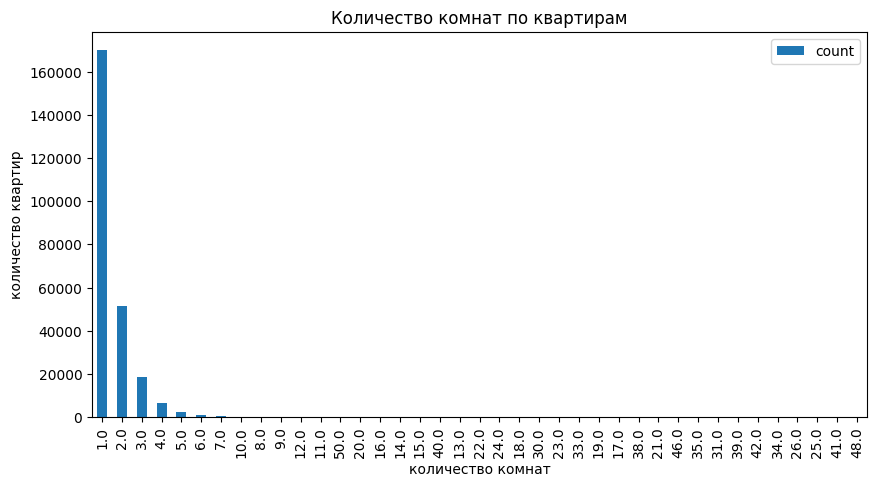

In [65]:
bedroom_count.to_frame().plot(kind = 'bar', figsize = (10,5))
plt.xlabel("количество комнат")
plt.ylabel("количество квартир")
plt.title("Количество комнат по квартирам")

#### Средняя цена квартиры

In [71]:
mean_price = listings.groupby("city")["price"].mean().sort_values(ascending = False)
mean_price

city
Cape Town         2405.120350
Bangkok           2078.278033
Mexico City       1149.253028
Hong Kong          746.169889
Rio de Janeiro     742.589254
Istanbul           532.557445
Sydney             222.013440
New York           142.842240
Paris              113.096445
Rome               105.107643
Name: price, dtype: float64

#### Рейтинг по чистоте

In [72]:
clean_score = listings.groupby("city")["review_scores_cleanliness"].mean().sort_values(ascending = False)
clean_score

city
Mexico City       9.564676
Cape Town         9.530781
Rome              9.496687
Bangkok           9.412901
Rio de Janeiro    9.392376
New York          9.268009
Sydney            9.206995
Paris             9.206446
Istanbul          9.054278
Hong Kong         8.992324
Name: review_scores_cleanliness, dtype: float64

#### Рейтинг по отзывам

In [73]:
review_scores_rating = listings.groupby("city")["review_scores_rating"].mean().sort_values(ascending = False)
review_scores_rating

city
Mexico City       94.837959
Rio de Janeiro    94.571349
Cape Town         94.404838
New York          93.767188
Rome              93.516489
Sydney            93.234135
Paris             93.063931
Bangkok           93.001699
Istanbul          91.063496
Hong Kong         89.707517
Name: review_scores_rating, dtype: float64

In [74]:
listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [82]:
corr_columns = [
    'accommodates', 
    'bedrooms', 
    'minimum_nights', 
    'maximum_nights',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value',
    'price'
]

corr_listings = listings[corr_columns]

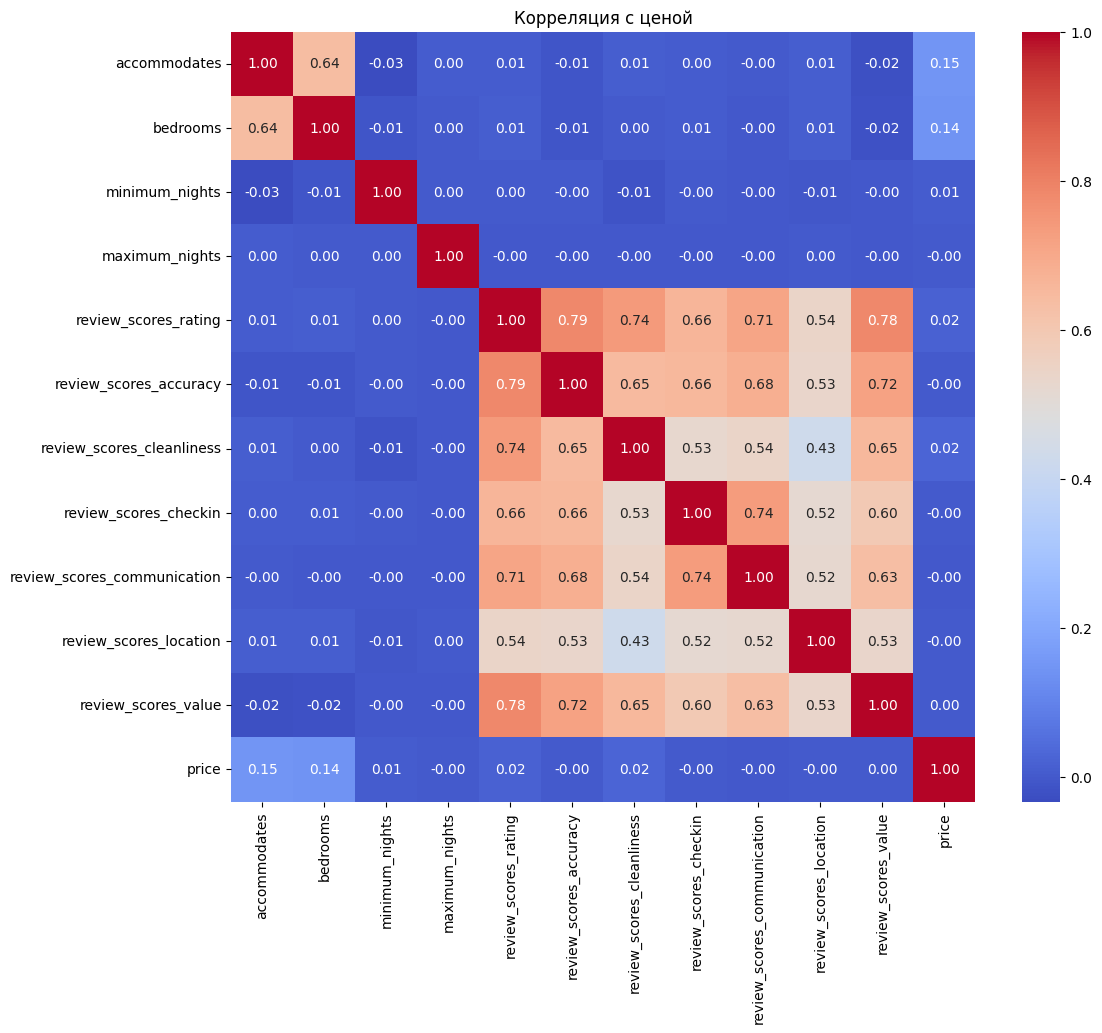

In [83]:
corr_heatmap = corr_listings.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_heatmap, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция с ценой")
plt.show()

In [93]:
listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')

listings['host_since_year'] = listings['host_since'].dt.year
listings['host_since_month'] = listings['host_since'].dt.month

listings['host_since_year_month'] = listings['host_since'].dt.to_period('M')

In [95]:
hosts_per_month = listings['host_since_year_month'].value_counts().sort_index()

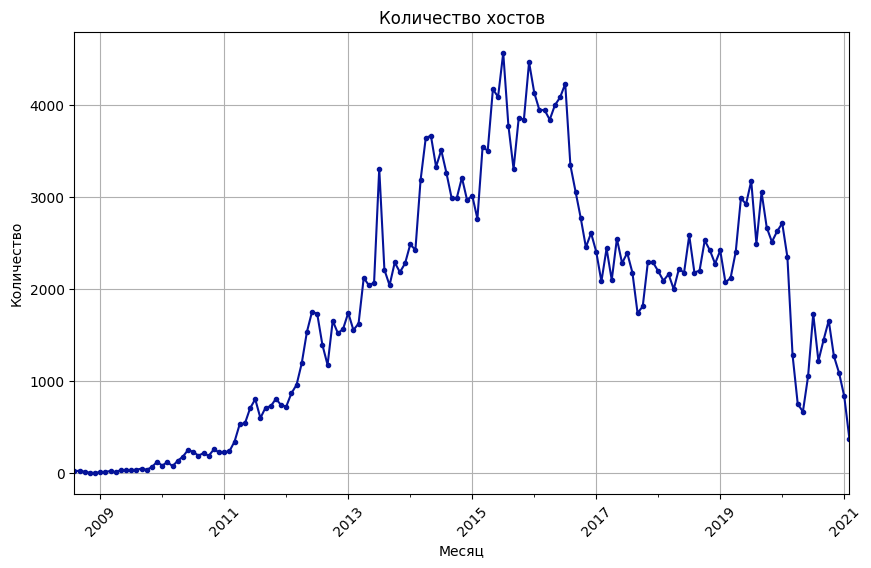

In [97]:
plt.figure(figsize = (10,6))
hosts_per_month.plot(kind = 'line', marker = '.', color = '#051399')
plt.title('Количество хостов')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

##### Суперхосты

In [101]:
superhost_proportion_by_city = listings.groupby('city')['host_is_superhost'].apply(
    lambda x: (x == 't').mean() * 100
).reset_index(name='superhost_proportion')

In [103]:
superhost_proportion_by_city = superhost_proportion_by_city.sort_values(by='superhost_proportion', ascending=False)

In [104]:
superhost_proportion_by_city

,city,superhost_proportion
4,Mexico City,31.856466
8,Rome,25.847289
1,Cape Town,24.106675
0,Bangkok,20.055782
5,New York,18.834432
2,Hong Kong,18.145901
7,Rio de Janeiro,17.106895
3,Istanbul,13.173457
6,Paris,12.539805
9,Sydney,12.129051


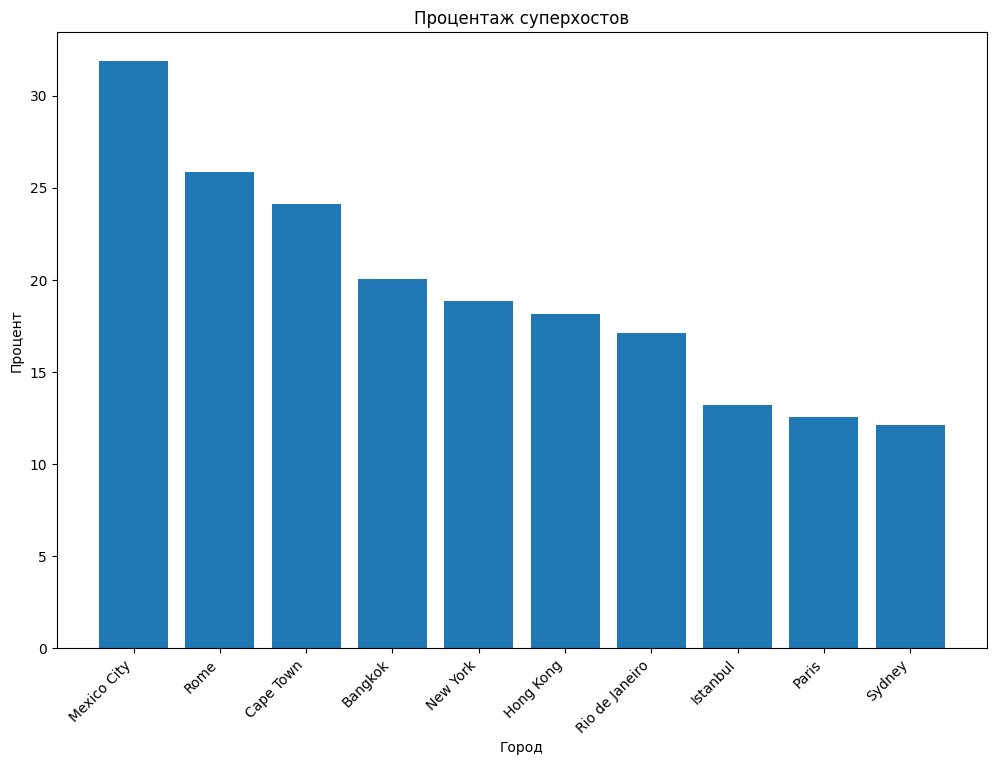

In [106]:
plt.figure(figsize=(12, 8))
plt.bar(superhost_proportion_by_city['city'], superhost_proportion_by_city['superhost_proportion'])
plt.xticks(rotation=45, ha='right')
plt.title('Процентаж суперхостов')
plt.xlabel('Город')
plt.ylabel('Процент')
plt.show()